In [1]:
!pip install wandb

     |████████████████████████████████| 1.8 MB 15.1 MB/s 
     |████████████████████████████████| 144 kB 86.6 MB/s 
     |████████████████████████████████| 181 kB 37.2 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=c7c8e2e69aecf9e49c6d39cda73d5fcecc6eba7613e112d45069837c728520a4
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [7]:
!pip install pytorch-lightning
!pip install transformers
!pip install sentencepiece
!pip install datasets
!pip install ml_things
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

     |████████████████████████████████| 584 kB 16.5 MB/s 
     |████████████████████████████████| 596 kB 76.4 MB/s 
     |████████████████████████████████| 136 kB 85.2 MB/s 
     |████████████████████████████████| 408 kB 89.6 MB/s 
     |████████████████████████████████| 1.1 MB 62.6 MB/s 
     |████████████████████████████████| 144 kB 81.0 MB/s 
     |████████████████████████████████| 94 kB 3.5 MB/s 
     |████████████████████████████████| 271 kB 93.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 4.0 MB 14.1 MB/s 
     |████████████████████████████████| 880 kB 89.4 MB/s 
     |████████████████████████████████| 6.6 MB 79.8 MB/s 
     |████████████████████████████████| 77 kB 7.0 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=65b911231809fcc4a4df77241048f92e13ecb027b971babb42fdf1323514c61a

Found existing installation: matplotlib 3.5.2
Uninstalling matplotlib-3.5.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.2
     |████████████████████████████████| 13.1 MB 642 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ml-things 0.0.1 requi

In [2]:
from ml_things import plot_dict, plot_confusion_matrix, fix_text

/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.

In [3]:
import wandb

wandb.init(project="cs_505", entity="project_nlp")

/usr/local/lib/python3.7/dist-packages/tornado/httputil.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  class HTTPHeaders(collections.MutableMapping):


<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
num_labels = 26
model_type = 'bert-base-multilingual-cased'

In [6]:
def read_from_file(filename):
    file = open(filename,"r")
    vocab = file.read().splitlines()
    return vocab

In [7]:
en_train_data_path = "/content/drive/MyDrive/CS505_project_data/train/english/tweet_by_ID_30_4_2022__04_17_45.txt.text"
en_train_labels_path = "/content/drive/MyDrive/CS505_project_data/train/english/tweet_by_ID_30_4_2022__04_17_45.txt.labels"
en_train_data = read_from_file(en_train_data_path)
en_train_labels = read_from_file(en_train_labels_path)
en_train_labels = [int(label) for label in en_train_labels]

In [8]:
from transformers import BertTokenizer
checkpoint = model_type
tokenizer_minilm = BertTokenizer.from_pretrained(checkpoint, do_lower_case=True)

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [9]:
max_len = 0

# For every sentence...
for sent in en_train_data[:1000]:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer_minilm.encode(sent, add_special_tokens=True)
    #print(sent1,sent2)
    #print(input_ids)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  60


In [10]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla V100-SXM2-16GB


In [11]:
import torch
def process_trainingdata(tokenizer, training_set, labels):
  # Tokenize all of the sentences and map the tokens to thier word IDs.
  input_ids = []
  attention_masks = []
  token_type_ids=[]

  # For every sentence...
  for sent in training_set:
    encoded_dict = tokenizer(
                        sent,                     # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 160,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

  # Convert the lists into tensors.
  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  labels = torch.tensor(labels)

  # Print sentence 0, now as a list of IDs.
  print('Original: ', training_set[0])
  print('Token IDs:', input_ids[0])
  return input_ids,attention_masks,labels

In [12]:
input_ids_minilm, attention_masks_minilm, labels_minilm = process_trainingdata(tokenizer_minilm, en_train_data, en_train_labels)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  Step out and explore. # ️ @ Ellis Island Cafe 
Token IDs: tensor([  101, 31877, 10950, 10111, 73073,   119,   108,   137, 30838, 10291,
        17354, 11135, 14601,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,   

In [13]:
from torch.utils.data import TensorDataset, random_split

def datasetsize(input_ids, attention_masks, labels):
  dataset = TensorDataset(input_ids, attention_masks, labels)

  train_size = int(0.9 * len(dataset))
  val_size = len(dataset) - train_size

  train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

  print('{:>5,} training samples'.format(train_size))
  print('{:>5,} validation samples'.format(val_size)) 
  return train_dataset,val_dataset

In [14]:
train_dataset_minilm, val_dataset_minilm = datasetsize(input_ids_minilm, attention_masks_minilm, labels_minilm)

346,747 training samples
38,528 validation samples


In [15]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
def dataloader(size,train_dataset,val_dataset):
  batch_size = size
 
  train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )
  validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )
  return train_dataloader, validation_dataloader

In [16]:
train_dataloader_minilm, validation_dataloader_minilm = dataloader(16, train_dataset_minilm, val_dataset_minilm)

In [17]:
from transformers import AutoConfig, BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model_minilm = BertForSequenceClassification.from_pretrained(
    model_type, 
    num_labels = num_labels,   
    output_attentions = False,
    output_hidden_states = False,
)

# Tell pytorch to run this model on the GPU.
model_minilm.cuda()

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [18]:
def optimizer(model):
  optimizer = AdamW(model.parameters(),
                  lr = 3e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
  return optimizer

In [19]:
optimizer_minilm = optimizer(model_minilm)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [20]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
def scheduler(train_dataloader,optimizer):
  epochs = 10

  # Total number of training steps is [number of batches] x [number of epochs]. 
  # (Note that this is not the same as the number of training samples).
  total_steps = len(train_dataloader) * epochs

  # Create the learning rate scheduler.
  scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps) 
  return scheduler

In [21]:
scheduler_minilm = scheduler(train_dataloader_minilm,optimizer_minilm)

In [22]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [23]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [24]:
def save(model, path):
    # save
    torch.save(model.state_dict(), path)

In [25]:
import random
import numpy as np

def modeltraining(model,train_dataloader,validation_dataloader,optimizer,scheduler):

  seed_val = 42

  random.seed(seed_val)
  np.random.seed(seed_val)
  torch.manual_seed(seed_val)
  torch.cuda.manual_seed_all(seed_val)

  training_stats = []

  total_t0 = time.time()
  epochs = 1
  all_loss = {'train_loss':[], 'val_loss':[]}
  all_acc = {'train_acc':[], 'val_acc':[]}

  for epoch_i in range(0, epochs):

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_train_loss = 0
    total_train_accuracy = 0
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        if step % 5000 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        

        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        total_train_accuracy += flat_accuracy(logits.detach().cpu().numpy(), b_labels.to('cpu').numpy())
        wandb.log({"train_acc" : total_train_accuracy})
        wandb.log({"train_loss" : loss})

        total_train_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        scheduler.step()

        if step % 5000 == 0 and not step == 0:

            save(model, '/content/drive/MyDrive/CS505_project_data/MultiBert/model/Multibert_EN.cpkt')

    avg_train_acc = total_train_accuracy / len(train_dataloader) 
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    training_time = format_time(time.time() - t0)
    

    print("")
    print("  Average training Accuracy: {0:.2f}".format(avg_train_acc))
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    for step, batch in enumerate(validation_dataloader):        
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():        
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        loss = result.loss
        logits = result.logits
            
        total_eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)
        wandb.log({"val_acc" : total_eval_accuracy})
        wandb.log({"val_loss" : loss})
        

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    validation_time = format_time(time.time() - t0)

    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Accu.': avg_train_acc,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )
    all_loss['train_loss'].append(avg_train_loss)
    all_loss['val_loss'].append(avg_val_loss)
    all_acc['train_acc'].append(avg_train_acc)
    all_acc['val_acc'].append(avg_val_accuracy)

  print("")
  print("Training complete!")

  print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
  #plot_dict(all_loss, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])

  # Plot accuracy curves.
  #plot_dict(all_acc, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])
  return model, training_stats, all_loss, all_acc


======== Epoch 1 / 1 ========
Training...
  Batch 5,000  of  21,672.    Elapsed: 0:12:32.
  Batch 10,000  of  21,672.    Elapsed: 0:25:13.
  Batch 15,000  of  21,672.    Elapsed: 0:37:47.
  Batch 20,000  of  21,672.    Elapsed: 0:50:22.

  Average training Accuracy: 0.34
  Average training loss: 2.22
  Training epcoh took: 0:54:36

Running Validation...
  Accuracy: 0.37
  Validation Loss: 2.09
  Validation took: 0:01:40

Training complete!
Total training took 0:56:16 (h:mm:ss)


/usr/local/lib/python3.7/dist-packages/ml_things/plot_functions.py:410: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  DeprecationWarning)


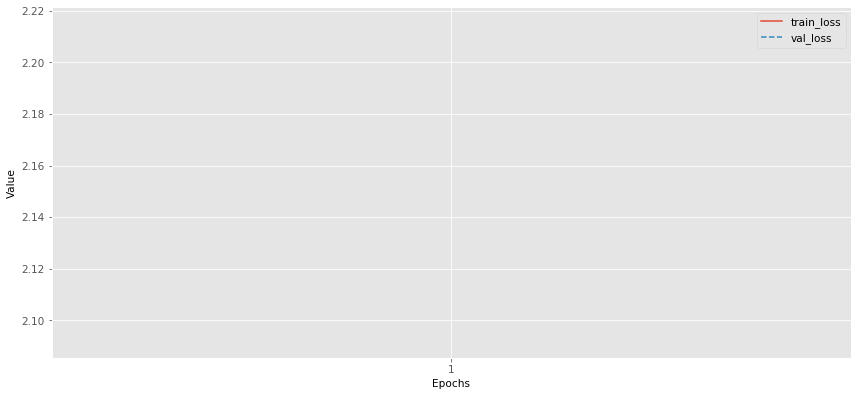

In [26]:
model_minilm, training_stats, all_loss, all_acc = modeltraining(model_minilm,train_dataloader_minilm,validation_dataloader_minilm,optimizer_minilm,scheduler_minilm)

In [ ]:
!pip install ml_things


  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [41]:
#from ml_things import plot_dict
#all_loss = {'train_loss':[2.02, 1.78, 1.68, 1.62], 'val_loss':[1.84, 1.75, 1.71, 1.70]}
#all_acc = {'train_acc':[], 'val_acc':[0.44, 0.47, 0.48, 0.48]}
#plot_dict(all_loss, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])

# Plot accuracy curves.
#plot_dict(all_acc, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])

In [27]:
#Clear CUDA cache
import gc

gc.collect()

torch.cuda.empty_cache()

In [28]:
en_test_data_path = "/content/drive/MyDrive/CS505_project_data/test/us_test.text"
en_test_labels_path = "/content/drive/MyDrive/CS505_project_data/test/us_test.labels"
en_test_data = read_from_file(en_test_data_path)
en_test_labels = read_from_file(en_test_labels_path)
en_test_labels = [int(label) for label in en_test_labels]

In [29]:
import torch
def process_testingdata(tokenizer, test_set, labels):
  # Tokenize all of the sentences and map the tokens to thier word IDs.
  input_ids = []
  attention_masks = []
  token_type_ids=[]

  # For every sentence...
  for sent in test_set:
    encoded_dict = tokenizer(
                        sent,                     # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 160,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

  # Convert the lists into tensors.
  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  labels = torch.tensor(labels)

  # Set the batch size.  
  batch_size = 16 

  # Create the DataLoader.
  prediction_data = TensorDataset(input_ids, attention_masks, labels)
  prediction_sampler = SequentialSampler(prediction_data)
  prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

  return prediction_dataloader

In [30]:
prediction_dataloader = process_testingdata(tokenizer_minilm, en_test_data, en_test_labels)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [31]:
def predicttestset(model,prediction_dataloader):
  model.eval()

  # Tracking variables 
  predictions , true_labels = [], []
  total_eval_accuracy = 0
  act_pred_label = []
  act_true_labels = []

  # Predict 
  for batch in prediction_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
  
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
  
    # Telling the model not to compute or store gradients, saving memory and 
    # speeding up prediction
    with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

    logits = result.logits
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    total_eval_accuracy += flat_accuracy(logits, label_ids)
  
    # Store predictions and true labels
    predictions.append(logits)
    #print(type(logits))
    true_labels.append(label_ids)
    predict_content = logits.argmax(axis=-1).flatten().tolist()
    act_pred_label += predict_content
    #print(act_pred_label)
    act_true_labels += label_ids.flatten().tolist()
    #print(act_pred_label)
  #print(len(act_pred_label),len(act_true_labels))
  return total_eval_accuracy*100/len(prediction_dataloader), act_pred_label,act_true_labels

In [32]:
acc_ee, pred_label_ee, true_labels_ee =  predicttestset(model_minilm, prediction_dataloader)

In [48]:
print("Validation accuracy: ", acc_ee)

Validation accuracy:  39.022


In [33]:
from sklearn.metrics import classification_report
emoji_list_ee = ['❤', '😍', '😂', '💕', '🔥', '😊', '😎', '✨', '💙', '😘', '📷', '🇺🇸', '☀', '💜', '😉', '💯', '😁', '🎄', '📸', '😜']
final_repo = classification_report(true_labels_ee, pred_label_ee, zero_division=1,target_names = emoji_list_ee)
print(final_repo)


              precision    recall  f1-score   support

           ❤       0.37      0.72      0.49     10798
           😍       0.29      0.28      0.29      4830
           😂       0.37      0.52      0.43      4534
           💕       0.57      0.00      0.01      2605
           🔥       0.51      0.57      0.54      3716
           😊       0.16      0.05      0.07      1613
           😎       0.24      0.14      0.18      1996
           ✨       0.39      0.21      0.27      2749
           💙       0.38      0.05      0.09      1549
           😘       0.43      0.01      0.01      1175
           📷       0.17      0.08      0.11      1432
          🇺🇸       0.70      0.55      0.62      1949
           ☀       0.32      0.52      0.40      1265
           💜       0.50      0.03      0.05      1114
           😉       0.15      0.02      0.03      1306
           💯       0.37      0.17      0.23      1244
           😁       0.20      0.00      0.00      1153
           🎄       0.62    

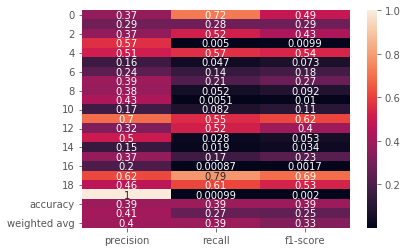

In [38]:
import pandas as pd
import seaborn as sns
evaluation_report = classification_report(true_labels_ee, pred_label_ee, output_dict=True, zero_division=1)
sns.heatmap(pd.DataFrame(evaluation_report).iloc[:-1, :].T, annot=True)

In [39]:
import pandas as pd
es_test_data_path = "/content/drive/MyDrive/CS505_project_data/test/es_modifiedTestData1.csv"
es_df = pd.read_csv(es_test_data_path)
es_test_data = es_df.Text.values
es_test_labels = es_df.Label.values

In [40]:
prediction_dataloader = process_testingdata(tokenizer_minilm, es_test_data, es_test_labels)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [41]:
acc_es, pred_label_es, true_labels_es =  predicttestset(model_minilm, prediction_dataloader)

In [50]:
from sklearn.metrics import classification_report
emoji_list_es = ['❤', '😍', '😂', '💕', '🔥', '😊', '😎', '✨', '💙', '😘', '📷', '🇺🇸', '☀', '💜', '😉', '💯', '😁', '🎄', '📸', '😜','💪', '👌', '🇪🇸', '💞', '🎶', '💘']
final_repo = classification_report(true_labels_es, pred_label_es, zero_division=1,target_names=emoji_list_es)
print(final_repo)

              precision    recall  f1-score   support

           ❤       0.32      0.45      0.38      2141
           😍       0.22      0.35      0.27      1408
           😂       0.28      0.70      0.40      1499
           💕       0.00      0.00      0.00       352
           🔥       0.00      1.00      0.00         0
           😊       0.08      0.01      0.01       514
           😎       0.13      0.05      0.07       339
           ✨       0.19      0.04      0.07       416
           💙       0.60      0.01      0.03       413
           😘       1.00      0.00      0.00       397
           📷       0.00      1.00      0.00         0
          🇺🇸       0.00      1.00      0.00         0
           ☀       0.00      1.00      0.00         0
           💜       1.00      0.00      0.00       235
           😉       0.00      0.00      0.00       453
           💯       0.00      1.00      0.00         0
           😁       1.00      0.00      0.00       209
           🎄       0.00    

In [45]:
print("Validation accuracy: ",acc_es)

Validation accuracy:  25.45


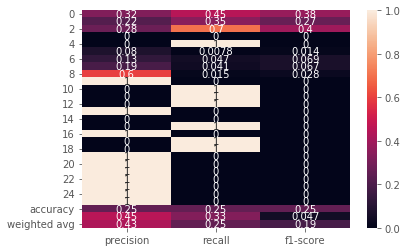

In [46]:
import pandas as pd
import seaborn as sns
evaluation_report = classification_report(true_labels_es, pred_label_es, output_dict=True, zero_division=1)
sns.heatmap(pd.DataFrame(evaluation_report).iloc[:-1, :].T, annot=True)